In [3]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 14.6 MB/s 
     |████████████████████████████████| 1.2 MB 65.3 MB/s 
     |████████████████████████████████| 189 kB 62.4 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 51 kB 333 kB/s 
Mounted at /content/gdrive


In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [5]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f063f07cd03b44768032b5d41b942ba6')

In [6]:
sixty_types = '60% keyboard','hhkb','wkl 60% keyboard'
path = Path('sixties')

In [28]:
if not path.exists():
    path.mkdir()
    for o in sixty_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, o)
        download_images(dest, urls=results.attrgot('contentUrl'))

In [29]:
fns = get_image_files(path)
fns

(#384) [Path('sixties/60% keyboard/00000060.jpg'),Path('sixties/60% keyboard/00000062.jpg'),Path('sixties/60% keyboard/00000083.jpg'),Path('sixties/60% keyboard/00000024.jpg'),Path('sixties/60% keyboard/00000121.png'),Path('sixties/60% keyboard/00000017.jpg'),Path('sixties/60% keyboard/00000095.jpg'),Path('sixties/60% keyboard/00000111.png'),Path('sixties/60% keyboard/00000082.jpg'),Path('sixties/60% keyboard/00000049.jpg')...]

In [30]:
failed = verify_images(fns)
failed

(#0) []

In [10]:
failed.map(Path.unlink)

(#3) [None,None,None]

In [31]:
keyboards = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [32]:
dls = keyboards.dataloaders(path)

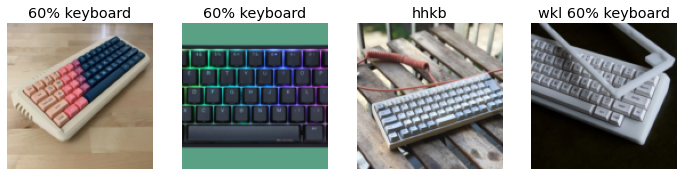

In [33]:
dls.valid.show_batch(max_n=4, nrows=1)

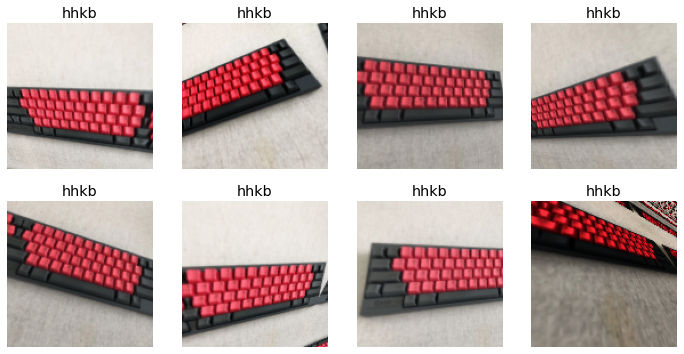

In [34]:
keyboards = keyboards.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = keyboards.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [35]:
keyboards = keyboards.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                          batch_tfms=aug_transforms())
dls = keyboards.dataloaders(path)

In [36]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

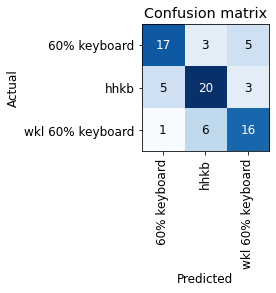

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

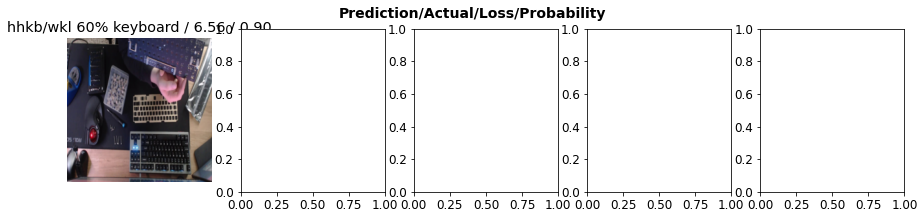

In [38]:
interp.plot_top_losses(5,nrows=1)

In [39]:
cleaner = ImageClassifierCleaner(learn)


In [21]:
cleaner

In [41]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [42]:
learn.export()

In [43]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [44]:
learn_inf = load_learner(path/'export.pkl')

In [48]:
learn_inf.dls.vocab

['60% keyboard', 'hhkb', 'wkl 60% keyboard']

In [49]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [54]:
btn_upload = SimpleNamespace(data = ['sixties/60% keyboard/00000062.jpg'])

In [55]:
img = PILImage.create(btn_upload.data[-1])

In [66]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [60]:
pred, pred_idx, probs = learn_inf.predict(img)

In [61]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: hhkb; Probability: 0.6972')

In [62]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [63]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [64]:
btn_upload = widgets.FileUpload()

In [67]:
VBox([widgets.Label('Select your Keyboard!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [1]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
